https://www.geeksforgeeks.org/longest-monotonically-increasing-subsequence-size-n-log-n/

Python program to find length of longest increasing subsequence in O(n Log n) time

Binary search (note boundaries in the caller)

A[] is ceilIndex in the caller

In [23]:
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def CeilIndex(A, l, r, key):

    while (r - l > 1):
    
        m = l + (r - l)//2
        if (A[m] >= key):
            r = m
        else:
            l = m
    return r
 

In [3]:
def LongestIncreasingSubsequenceLength(A, size):

    # Add boundary case,
    # when array size is one
    if size == 0:
        return 0
    if size == 1:
        return 1
 
    tailTable = [0 for i in range(size + 1)]
    len = 0 # always points empty slot
    
    tailTable[0] = A[0]
    len = 1
    for i in range(1, size):
    
        if (A[i] < tailTable[0]):

            # new smallest value
            tailTable[0] = A[i]
 
        elif (A[i] > tailTable[len-1]):

            # A[i] wants to extend
            # largest subsequence
            tailTable[len] = A[i]
            len+= 1
 
        else:
            # A[i] wants to be current
            # end candidate of an existing
            # subsequence. It will replace
            # ceil value in tailTable
            tailTable[CeilIndex(tailTable, -1, len-1, A[i])] = A[i]
        #print(tailTable)
        
    return len


Complexity:
The loop runs for N elements. In the worst case (what is worst case input?), we may end up querying ceil value using binary search (log i) for many A[i].
Therefore, T(n) < O( log N! )  = O(N log N). Analyse to ensure that the upper and lower bounds are also O( N log N ). The complexity is THETA (N log N).


In [4]:

# Driver program to
# test above function

#A =[10,9,2,5,3,7,101,18]   
# 4

#A =[0,8,4,12,2,10,6,14,1,9,5,13,3,11,7,15]
#6

A=[5,8,3,7,9,1]
#3



n = len(A)
#n=16
print("Length of Longest Increasing Subsequence is ",
       LongestIncreasingSubsequenceLength(A, n))


Length of Longest Increasing Subsequence is  3


In [35]:
def empericalAnalysis2():
    i = 0
    time=[]
    s=1
    size=[]
    while s< 20:
        size.append(s*200)
        s+=1
    
    i=0
    while i < len(size):
        array = np.random.randint(1,99999999,size[i])
        timeinthissize=[]
        k=1
        while k <50:
            start_time =  datetime.datetime.now()

            LongestIncreasingSubsequenceLength(array,len(array))

            end_time =  datetime.datetime.now()
            time_elapsed = (end_time - start_time)
            time_elapsed =int(time_elapsed.total_seconds() * 1000)
            timeinthissize.append(time_elapsed)
            k=k+1

        time.append(sum(timeinthissize) / len(timeinthissize))
        timeinthissize=[]
        i=i+1

    # x axis values
    x = time
    # corresponding y axis values
    y =size

    # plotting the points
    plt.plot(y, x)

    # naming the x axis
    plt.xlabel('Proplem size')
    # naming the y axis
    plt.ylabel('computation time in secounds')

    # giving a title to my graph
    plt.title('patient sort')

    # function to show the plot
    plt.show()

In [40]:
def main():
    empericalAnalysis2()

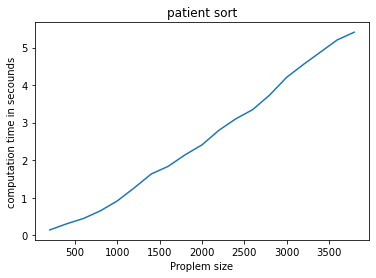

In [41]:
if __name__ == "__main__":
    main()